In [215]:
import os
import yaml

import pandas as pd
import matplotlib.pyplot as plt

In [216]:
path = '../results'

episodes = []
description = {}

for trial_folder in os.listdir(path):

    for run_folder in os.listdir(os.path.join(path, trial_folder)):

        if run_folder == 'hyperparameters.yml':
            with open(os.path.join(path, trial_folder, run_folder)) as stream:
                config = yaml.safe_load(stream)

            description[trial_folder] = config

        if '.yml' in run_folder:
            continue

        csv_path = os.path.join(path, trial_folder, run_folder, 'results.csv')
        df = pd.read_csv(csv_path, sep=';')

        df['trial_id'] = trial_folder
        df['run_id'] = run_folder

        episodes.append(df)

# Step 7: Concatenate the list of dataframes into a single dataframe
episodes = pd.concat(episodes, ignore_index=True)
episodes = episodes.sort_values(by=['trial_id', 'run_id', 'episode'])
episodes = episodes[[
    'trial_id',
    'run_id',
    'episode',
    'training_score',
    'evaluation_score',
    'epsilon',
    'training_actions',
    'evaluation_actions',
    'evaluation_observations',
    'evaluation_predictions']]


# Plotting

2023-03-10_10-41-56_thread_0_trial_0 classical {'layers': 2, 'neurons': 64}
2023-03-10_10-41-56_thread_1_trial_0 classical {'layers': 2, 'neurons': 64}


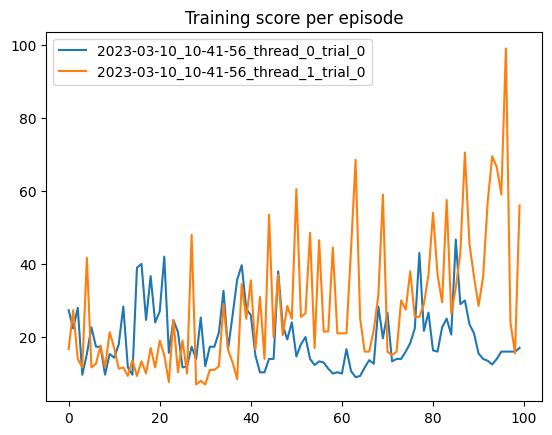

In [217]:
train_score = episodes.groupby(['trial_id', 'episode'])['training_score'].mean()

train_score = train_score.reset_index()
train_score_groups = train_score.groupby('trial_id')
fig, ax = plt.subplots()
for name, group in train_score_groups:
    ax.plot(group.episode, group.training_score, label=name)
    mode = description[name]['mode']
    print(name, mode, description[name][mode])

ax.set_title('Training score per episode')
ax.legend()
plt.show()


                               trial_id  episode  evaluation_score   epsilon
0  2023-03-10_10-41-56_thread_0_trial_0        0         39.333333  0.920000
1  2023-03-10_10-41-56_thread_0_trial_0        1         10.333333  0.840000
2  2023-03-10_10-41-56_thread_0_trial_0        2          9.333333  0.746667
3  2023-03-10_10-41-56_thread_0_trial_0        3          9.333333  0.713333
4  2023-03-10_10-41-56_thread_0_trial_0        4          9.333333  0.670000
2023-03-10_10-41-56_thread_0_trial_0 classical {'layers': 2, 'neurons': 64}
2023-03-10_10-41-56_thread_1_trial_0 classical {'layers': 2, 'neurons': 64}


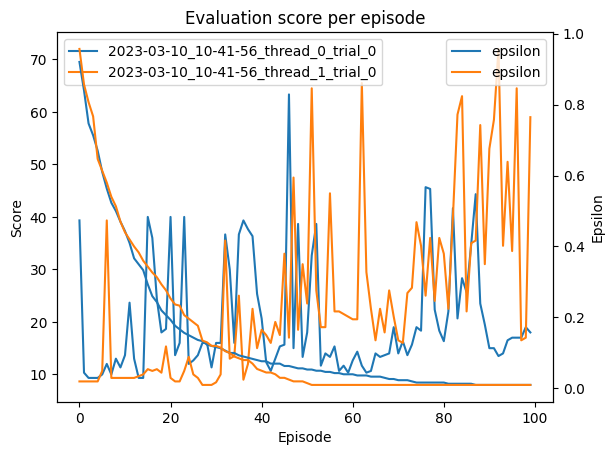

In [218]:
# show distribution of actions per run
# show epsilon somehow

eval_score = episodes.groupby(['trial_id', 'episode']).agg({
    'evaluation_score': 'mean',
    'epsilon': 'mean'
})

eval_score = eval_score.reset_index()

eval_score_groups = eval_score.groupby('trial_id')

fig, ax1 = plt.subplots()
for name, group in eval_score_groups:
    ax1.plot(group.episode, group.evaluation_score, label=name)
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Score')
    mode = description[name]['mode']
    print(name, mode, description[name][mode])

ax2 = ax1.twinx()
for name, group in eval_score_groups:
    ax2.plot(group.episode, group.epsilon, label='epsilon')
    ax2.set_ylabel('Epsilon')

ax1.set_title('Evaluation score per episode')
ax1.legend()
ax2.legend()
plt.show()

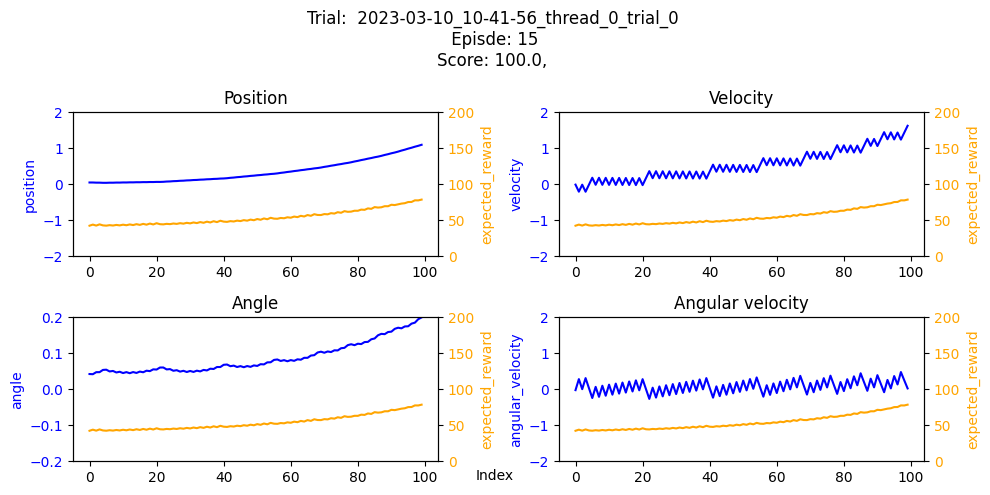

In [252]:
import ast


def plot_episode(row):
    predictions = episodes.loc[row, 'evaluation_predictions']
    predictions = ast.literal_eval(predictions)
    observations = episodes.loc[row, 'evaluation_observations']
    observations = ast.literal_eval(observations)
    observations = pd.DataFrame(observations, columns=['position', 'velocity', 'angle', 'angular_velocity'])
    predictions = pd.DataFrame(predictions, columns=['move_left_expected_reward', 'move_right_expected_reward'])
    agent_data = pd.concat([observations, predictions], axis=1)
    agent_data['expected_reward'] = agent_data[['move_left_expected_reward', 'move_right_expected_reward']].max(axis=1)
    fig, axs = plt.subplots(2, 2, figsize=(10, 5))

    ax000 = axs[0, 0]
    ax001 = ax000.twinx()
    ax000.set_title('Position')
    ax000.plot(agent_data.index, agent_data['position'], color='blue', label='position')
    ax000.set_ylim(-2, 2)
    ax000.tick_params(axis='y', labelcolor='blue')
    ax000.set_ylabel('position', color='blue')
    ax001.plot(agent_data.index, agent_data['expected_reward'], color='orange',
               label='expected_reward')
    ax001.set_ylim(0, 200)
    ax001.tick_params(axis='y', labelcolor='orange')
    ax001.set_ylabel('expected_reward', color='orange')

    ax010 = axs[0, 1]
    ax011 = ax010.twinx()
    ax010.set_title('Velocity')
    ax010.plot(agent_data.index, agent_data['velocity'], color='blue', label='velocity')
    ax010.set_ylim(-2, 2)
    ax010.tick_params(axis='y', labelcolor='blue')
    ax010.set_ylabel('velocity', color='blue')
    ax011.plot(agent_data.index, agent_data['expected_reward'], color='orange',
               label='expected_reward')
    ax011.set_ylim(0, 200)
    ax011.tick_params(axis='y', labelcolor='orange')
    ax011.set_ylabel('expected_reward', color='orange')

    ax100 = axs[1, 0]
    ax101 = ax100.twinx()
    ax100.set_title('Angle')
    ax100.plot(agent_data.index, agent_data['angle'], color='blue', label='angle')
    ax100.set_ylim(-0.2, 0.2)
    ax100.tick_params(axis='y', labelcolor='blue')
    ax100.set_ylabel('angle', color='blue')
    ax101.plot(agent_data.index, agent_data['expected_reward'], color='orange',
               label='expected_reward')
    ax101.set_ylim(0, 200)
    ax101.tick_params(axis='y', labelcolor='orange')
    ax101.set_ylabel('expected_reward', color='orange')

    ax110 = axs[1, 1]
    ax111 = ax110.twinx()
    ax110.set_title('Angular velocity')
    ax110.plot(agent_data.index, agent_data['angular_velocity'], color='blue', label='angular_velocity')
    ax110.set_ylim(-2, 2)
    ax110.tick_params(axis='y', labelcolor='blue')
    ax110.set_ylabel('angular_velocity', color='blue')
    ax111.plot(agent_data.index, agent_data['expected_reward'], color='orange',
               label='expected_reward')
    ax111.set_ylim(0, 200)
    ax111.tick_params(axis='y', labelcolor='orange')
    ax111.set_ylabel('expected_reward', color='orange')

    fig.suptitle(f'Trial:  {episodes.loc[row, "trial_id"]} \n '
                 f'Episde: {episodes.loc[row, "episode"]} \n'
                 f'Score: {episodes.loc[row, "evaluation_score"]}, ')
    fig.text(0.5, 0.04, 'Index', ha='center')
    fig.tight_layout()
    # Create a single legend for all axes
    handles, labels = [], []
    for ax in axs.flatten():
        h, l = ax.get_legend_handles_labels()
        handles += h
        labels += l
    plt.show()


plot_episode(115)



In [250]:
episodes.iloc[10]

trial_id                                2023-03-10_10-41-56_thread_0_trial_0
run_id                                                                 run_0
episode                                                                   10
training_score                                                            13
evaluation_score                                                        10.0
epsilon                                                                 0.44
training_actions                  [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1]
evaluation_actions                            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
evaluation_observations    [[0.047669977, -0.0119804265, 0.042324625, -0....
evaluation_predictions     [[39.73223, 58.211952], [43.708973, 65.77344],...
Name: 10, dtype: object

In [251]:
episodes[episodes['evaluation_score'] > 71]

,trial_id,run_id,episode,training_score,evaluation_score,epsilon,training_actions,evaluation_actions,evaluation_observations,evaluation_predictions
115,2023-03-10_10-41-56_thread_0_trial_0,run_1,15,91,100.0,0.20,"[0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, ...","[0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...","[[0.047669977, -0.0119804265, 0.042324625, -0....","[[42.375084, 42.14485], [42.878994, 43.90122],..."
116,2023-03-10_10-41-56_thread_0_trial_0,run_1,16,99,88.0,0.13,"[0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, ...","[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, ...","[[0.047669977, -0.0119804265, 0.042324625, -0....","[[78.51536, 79.81853], [79.347946, 78.964386],..."
120,2023-03-10_10-41-56_thread_0_trial_0,run_1,20,53,100.0,0.05,"[0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, ...","[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...","[[0.047669977, -0.0119804265, 0.042324625, -0....","[[97.47904, 97.9247], [98.8517, 97.42734], [97..."
123,2023-03-10_10-41-56_thread_0_trial_0,run_1,23,51,100.0,0.02,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, ...","[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...","[[0.047669977, -0.0119804265, 0.042324625, -0....","[[89.63501, 90.05942], [90.59709, 88.994545], ..."
132,2023-03-10_10-41-56_thread_0_trial_0,run_1,32,32,92.0,0.01,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, ...","[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...","[[0.047669977, -0.0119804265, 0.042324625, -0....","[[102.07517, 102.32329], [103.748505, 101.9957..."
133,2023-03-10_10-41-56_thread_0_trial_0,run_1,33,47,72.0,0.01,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, ...","[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, ...","[[0.047669977, -0.0119804265, 0.042324625, -0....","[[99.010704, 100.63282], [101.3592, 101.00525]..."
135,2023-03-10_10-41-56_thread_0_trial_0,run_1,35,30,92.0,0.01,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...","[[0.047669977, -0.0119804265, 0.042324625, -0....","[[91.5251, 91.73485], [92.652176, 90.68549], [..."
136,2023-03-10_10-41-56_thread_0_trial_0,run_1,36,60,100.0,0.01,"[1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...","[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...","[[0.047669977, -0.0119804265, 0.042324625, -0....","[[92.88938, 94.0601], [94.66558, 93.8607], [92..."
137,2023-03-10_10-41-56_thread_0_trial_0,run_1,37,85,95.0,0.01,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...","[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...","[[0.047669977, -0.0119804265, 0.042324625, -0....","[[91.40386, 91.77672], [92.49992, 90.81215], [..."
138,2023-03-10_10-41-56_thread_0_trial_0,run_1,38,99,91.0,0.01,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...","[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...","[[0.047669977, -0.0119804265, 0.042324625, -0....","[[93.436066, 94.89136], [94.698944, 94.21412],..."


In [247]:
# get index of hightest evaluation score


,trial_id,evaluation_score
0,2023-03-10_10-41-56_thread_0_trial_0,63.333333
1,2023-03-10_10-41-56_thread_1_trial_0,72.000000
